In [27]:
# This script illustrates the usage of Decision Trees. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# load the data set
# load_iris() loads and returns the iris dataset (classification).
iris = load_iris()
# load_iris() returns a dictionary-like object. The interesting attributes are: 
# ‘data’, the data to learn, 
# ‘target’, the classification labels, 
# ‘target_names’, the meaning of the labels, 
# ‘feature_names’, the meaning of the features, and 
# ‘DESCR’, the full description of the dataset.

# Wikipedia entry for this data set: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [29]:
## Explore the data set
n_samples, n_features = iris.data.shape
#print(iris.keys())
print 'The dimensions of the data set are', n_samples, 'by', n_features
# It is made of 150 observations of irises, each described by 4 features: their sepal and petal length and width, as detailed in iris.DESCR.

#print(iris.data.shape)
#print(iris.target.shape)
print 'The classes are:', iris.target_names
print 'The features in the data set are:', iris.feature_names

# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored
# in a 150x4 numpy.ndarray
# The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

The dimensions of the data set are 150 by 4
The classes are: ['setosa' 'versicolor' 'virginica']
The features in the data set are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


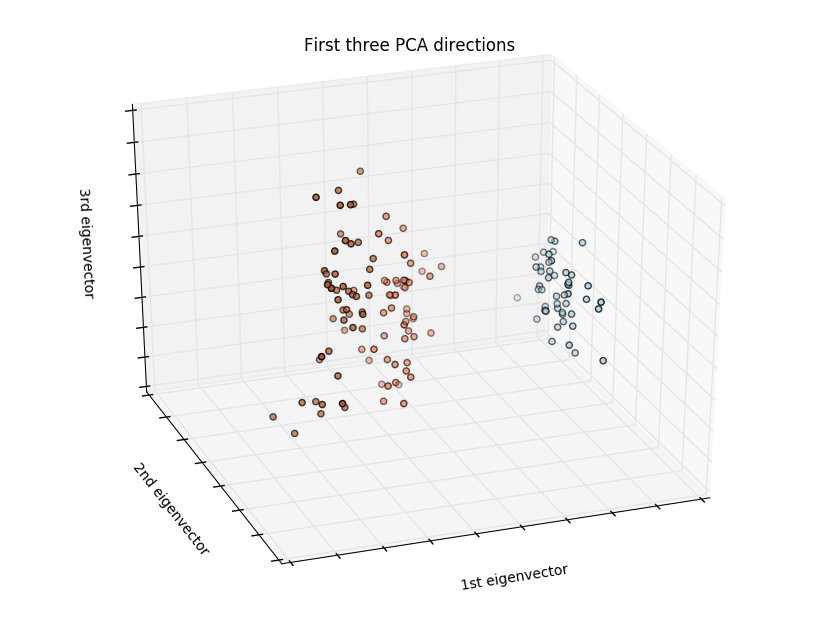

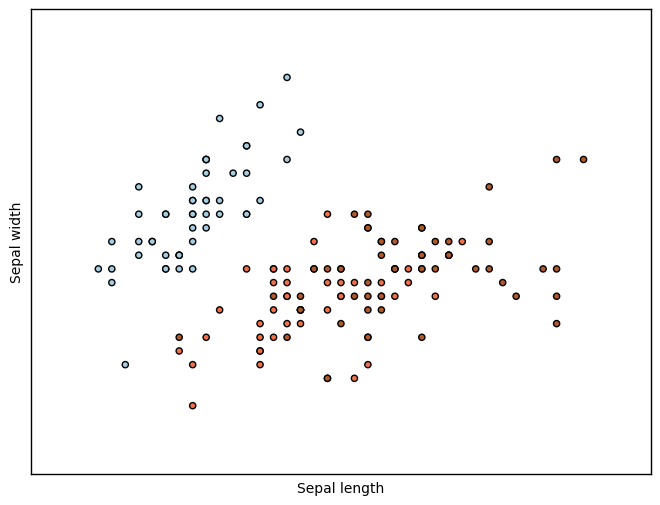

In [30]:
## Visualization of the data set
from mpl_toolkits.mplot3d import Axes3D

X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
    cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [31]:
# Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
# The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.# We create an instance of the Classifier

# We start with initializing our classifier. 
clf = tree.DecisionTreeClassifier()

# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

# We call our estimator instance clf, as it is a classifier. 
# It now must be fitted to the model, that is, it must learn from the model. 
# This is done by passing our training set to the fit method. 

In [32]:
## Train the model (fit the data)
# 'fit' builds a decision tree from the training set (X, y).
clf = clf.fit(iris.data, iris.target)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: 
# an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and 
# an array Y of integer values, size [n_samples], holding the class labels for the training samples:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

# Now you can predict new values

In [33]:
## Evaluate performance by cross-validation

scores = cross_val_score(clf, iris.data, iris.target, cv=10)
#print scores
# returns an array of scores of the estimator for each run of the cross validation.
# The simplest way to use cross-validation

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# After being fitted, the model can then be used to predict the class of samples:
print 'The 1st instance is predicted to belong to class:', clf.predict(iris.data[:1, :])
# Here we predict the class of a single value

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print 'The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(iris.data[:1, :])
# Here you can see the probability of each one of the classes

Accuracy: 0.96 (+/- 0.09)
The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[ 1.  0.  0.]]


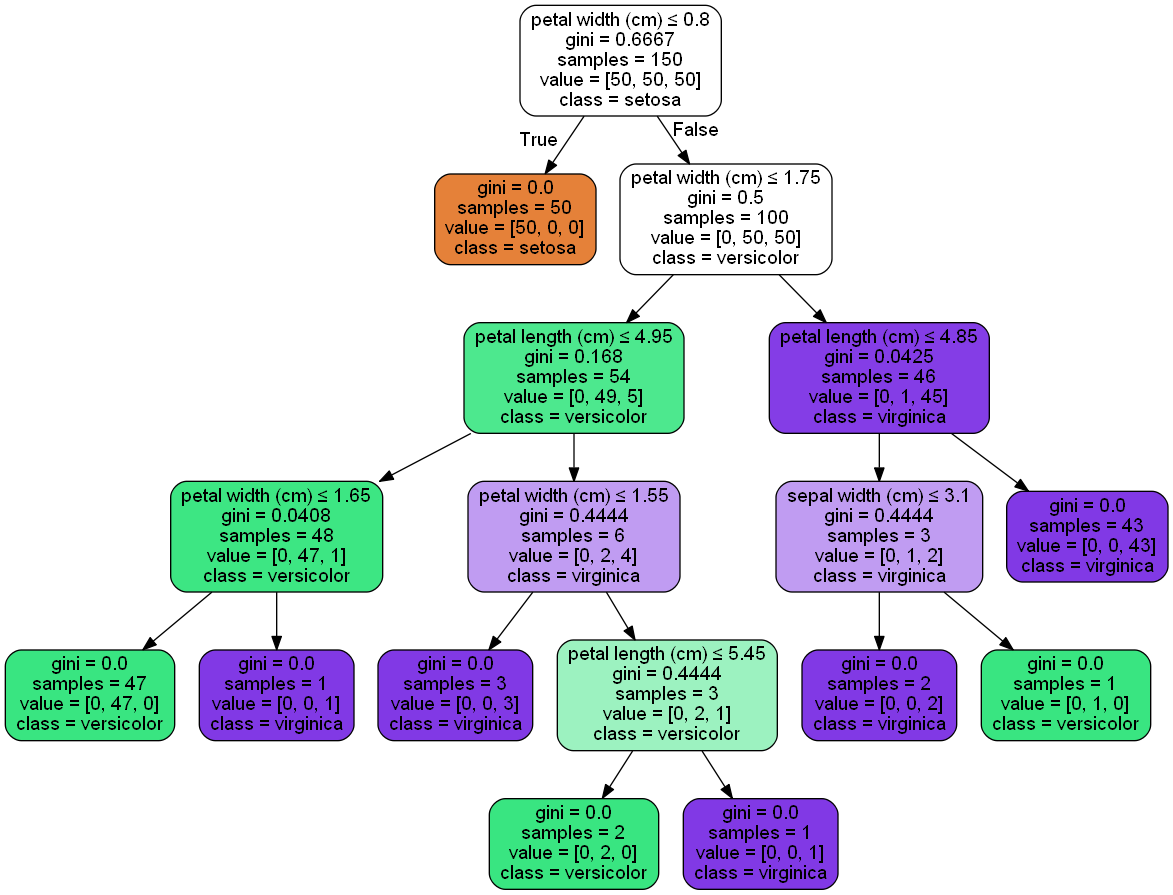

In [34]:
## Tree Visualization
# if we have Python module pydot installed, we can generate a PDF file (or any other supported file type) directly in Python
# ! pip install --user <package>
from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  

#from IPython.display import Image #needed to render in notebook
#Image(graph.create_png())

import os
import graphviz

tree.export_graphviz(clf, out_file=os.getcwd() + os.pathsep + "irisTree.dot")
with open(os.getcwd() + os.pathsep + "irisTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(tree.export_graphviz(clf))

# we can store the plot locally as odf
graph.write_pdf(os.getcwd() + os.pathsep + "irisTree.pdf")
# for png format:
pydot.graph_from_dot_data(dot_data.getvalue())[0].write_png(os.getcwd() + os.pathsep + "irisTree.png")

# we can also load these files on our notebook
from IPython.display import Image #needed to render in notebook
Image(os.getcwd() + os.pathsep + "irisTree.png")

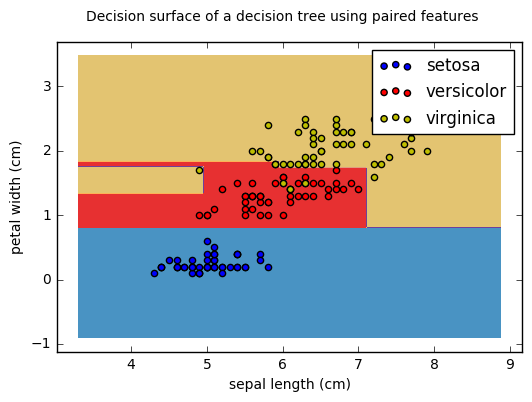

In [35]:
## Decision Boundary Visualization:
# Plot the decision surface of a decision tree

# Parameters
featureA, featureB = 0, 3 # select two variables to visualize
plot_colors = "bry"
plot_step = 0.02  # step size in the mesh

X = iris.data[:, [featureA, featureB] ] # We only take the two corresponding features
y = iris.target

n_classes = len(set(y))

# Train
clf = tree.DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].   
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[featureA])
plt.ylabel(iris.feature_names[featureB])
plt.axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

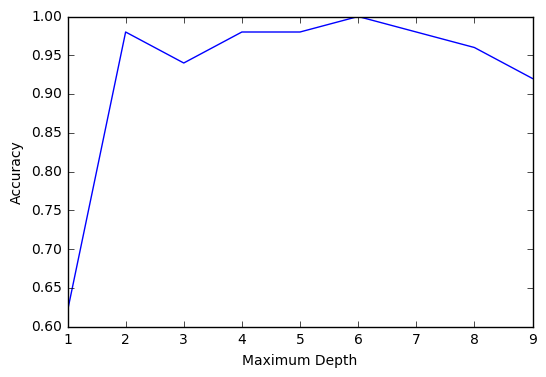

In [36]:
# Optimize decision tree and detect (potential) over-fitting
# I will try maximum depths from 1 to 10
complexity_values = range(1,10)

# I need an empty list to hold my accuracies
accuracies = []

# I will go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)
    accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    
# We want to plot our results
plt.plot(complexity_values, accuracies)
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Overview of decision trees (http://scikit-learn.org/stable/modules/tree.html#tree)

'''
Some advantages of decision trees are:
- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.
''''''